In [1]:
# test the fitting: Logistic

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary

In [3]:
folder = "0821_Logit_40_20/"

In [4]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [5]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    err = data['err']
    params = data['params']
    row_dict = {"iter":iter,"particle":p,"err":err}
    row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
    pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,204589.123580,0.854535,0.848605,0.490889,0.096768,0.714878,0.840513
1,1.0,1.0,203013.280449,0.140069,0.108044,0.775389,0.136780,0.816342,0.692326
2,1.0,2.0,205750.074132,0.650235,0.588915,0.577988,0.727722,0.825204,2.600129
3,1.0,3.0,206805.044119,0.886215,0.322231,0.955619,0.321832,0.361187,2.666136
4,1.0,4.0,206139.236342,0.816808,0.568163,0.797508,0.054369,0.623758,0.898800
...,...,...,...,...,...,...,...,...,...
795,40.0,15.0,180099.335771,0.272404,0.216786,0.010000,0.870062,0.672991,0.000000
796,40.0,16.0,180092.442318,0.233265,0.129183,0.010000,0.939851,0.669012,0.000000
797,40.0,17.0,180149.073688,0.281066,0.210124,0.010000,0.858960,0.622790,0.000000
798,40.0,18.0,180099.401937,0.271158,0.203434,0.010000,0.944614,0.666785,0.000000


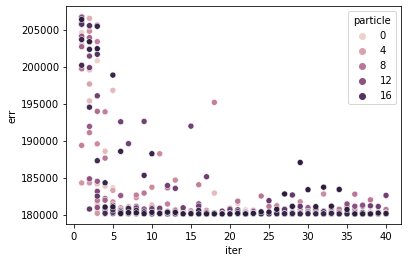

In [6]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

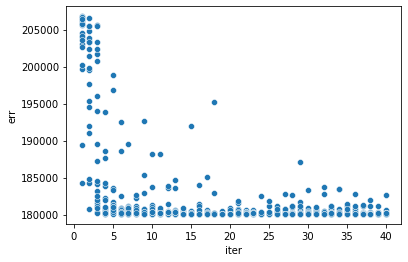

In [7]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

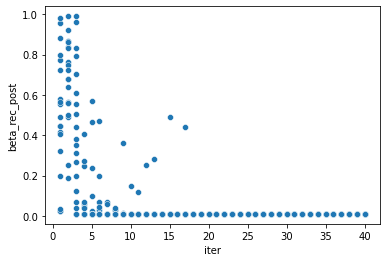

In [8]:
sns.scatterplot(data=pso_df, x="iter", y="beta_rec_post")
plt.show()

In [9]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.29318,
 'beta_rec': 0.202461,
 'beta_rec_post': 0.01,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.0,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.947048,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'gamma_fc': 0.666326,
 'gamma_cf': 0.5}

### Run CMR2 on the Best Params

In [10]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [11]:
rng = np.random.default_rng(seed=42)

In [12]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,547
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,547
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,547
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,547


In [13]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [14]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 231.692400932312


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.0,0.000000
57766,0,1,26,0.0,0.0,0.000000
58224,0,2,33,0.0,0.0,0.000000
58695,0,3,151,0.0,0.0,0.000000
59159,0,4,187,0.0,0.0,0.000000
...,...,...,...,...,...,...
337333,547,575,60,0.0,0.0,0.655889
337508,547,576,10,0.0,0.0,0.740231
337682,547,577,265,0.0,0.0,0.810956
337870,547,578,213,0.0,0.0,0.742470


In [15]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.0,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,0.0,0.000000,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,0.0,0.000000,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,0.0,0.000000,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,0.0,0.000000,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317835,547,575,60,0.0,0.0,0.655889,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
317836,547,576,10,0.0,0.0,0.740231,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
317837,547,577,265,0.0,0.0,0.810956,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
317838,547,578,213,0.0,0.0,0.742470,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


In [16]:
f = folder.rstrip("/")

In [17]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)